<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Марк! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела. 
     
    
 

<div class="alert alert-warning">


Совет: 
   
Вопросик, при желании можешь ответить )
    
    
- а почему по твоему была выбрана метрика f1? 
    
    
- а что если бы нам было нужно найти как можно больше токсичных комментариев, в этом случаи на какую метрику мы бы ориентировались?
    
    
- каким образом мы можем изменить функцию ошибки в модели, чтобы она максимизировала интересующую нас метрику (accuracy, f1, precision, roc-auc итп)?    



</div>

## Подготовка

In [4]:
# Импортирование необходимых библиотек:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import warnings
import lightgbm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [5]:
warnings.filterwarnings('ignore')


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">

Совет:     
    


- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить



In [6]:
nltk.download('wordnet','stopwords','punkt','averaged_perceptron_tagger')

True

In [7]:
# Чтение датасета:
df = pd.read_csv('/datasets/toxic_comments.csv', index_col=0)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Если не знаешь - чтобы не было столбца  `Unnamed: 0` при чтении файла можно так:


    pd.read_csv(..., index_col=0)

    
(`Unnamed: 0` появляется при не совсем корректном сохранении файла)    

<div>

In [8]:
# Рассмотрим общую информацию о данных:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


[89.83878663 10.16121337]


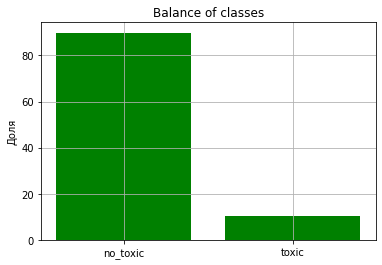

In [9]:
# Так как перед нами задача классификации не будет лишним взглянуть на баланс классов:
plt.bar(x=['no_toxic', 'toxic'], height = (df['toxic'].value_counts() / df.shape[0] * 100), color='g')
plt.title('Balance of classes')
plt.ylabel('Доля')
plt.grid()
print((df['toxic'].value_counts() / df.shape[0] * 100).values)

Не сложно заметить, что баланс классов сильно смещен в сторону позитивных комментариев.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены. Небольшой EDA не помешает, так как это аналитический проект. 


Плюс за


    
-  проверку на сбалансированность 



- промужуточный вывод в конце раздела




<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Перед лематизацией рекомендую сделать очистку текста - Нам не нужны знаки пунктуации, цифры и не латинские буквы


</div>

In [10]:
def cleaning(text):
    text = re.sub(r"(?:\n|\r)", " ", text)
    text = re.sub(r"[^a-zA-Z ]+", "", text).strip()
    text = text.lower()
    return text

df['text'] = df['text'].apply(cleaning)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Исправление принято




</div>


In [11]:
corpus = df.copy()

In [12]:
lemm = WordNetLemmatizer()

In [13]:
# Получаем словарь с частями речи:
def get_pos_tag(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
 
    return tag_dict.get(tag, wordnet.NOUN)

In [14]:
# Лемматизация
def get_word_text(corpus):
  i = []
  for sentence in corpus:
    i.append(' '.join([lemm.lemmatize(w, get_pos_tag(w)) for w in nltk.word_tokenize(sentence)]))
  return i

In [15]:
corpus['text'] = corpus['text'].apply(lambda x: " ". join(x.split()))

In [16]:
corpus.head()

,text,toxic
0,explanation why the edits made under my userna...,0
1,daww he matches this background colour im seem...,0
2,hey man im really not trying to edit war its j...,0
3,more i cant make any real suggestions on impro...,0
4,you sir are my hero any chance you remember wh...,0


In [17]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
corpus['text'] = get_word_text(corpus['text'])
corpus.head()

,text,toxic
0,explanation why the edits make under my userna...,0
1,daww he match this background colour im seemin...,0
2,hey man im really not try to edit war it just ...,0
3,more i cant make any real suggestion on improv...,0
4,you sir be my hero any chance you remember wha...,0


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

- Тобой найдены хорошие функции для лемитизации, не забыто о особенности WordNetLemmatizer (POS-теги) и применено корректно


- Плюс за использование apply, неэффективные циклы нам ни к чему.


- Да, всегда лучше проверить что получилось  в итоге, так всегда будет возможность поправить ошбку

<div class="alert alert-warning">


Совет: 


- попробуй .progress_apply, делает что .apply, но еще и показывает на какой итерации находится процесс


    
- после очистки и лемитизации можно провести частотный анализ текста/[облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встерчаемых словах Кроме того графики, рисунки делают проект визуально интересней
    
    

- все это можно было сделать с помощью SpaCy лемматизатором и прямо скажем как инстурмент он более удобен и универсален, можно [почитать](https://habr.com/ru/post/531940/)  


In [19]:
# Стопслова:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Не забыли о стопсловах, они ни к чему и код побежит быстрей

    
<div class="alert alert-warning">


Совет:     

Вопросик:

А стопслова важней убирать  когда мы используем TF-IDF, или когда используе обычный CountVectorizer? 



## Обучение

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Ошибка ❌:



вот это всё не нужно.  Закомментируй этот код

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Лишний код. Ещё и random_state  забыл
</div>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:



Не используешь random_state, в результате при каждом запуске кода Сплит будет разный, как следствие будут разные результаты. Тебе вообще этот код не нужен, dtlm ты используешь pipeline. 
    
    
Чтобы использовать правильно:
    
    
1.    По-разному сделай название модели, пока у тебя они одинаковые: grid (grid_rf, grid_lr) 
    
    
2.    используй 
    
    
    lr_pred = grid_lr.best_estimator_.predict(features_valid)
    

 

</div>

### Логистическая регрессия

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


- random_state на месте


- правильно разбил на 2 выборки (иногда студенты использующие GS разбивают на 3 датасета)



<div class="alert alert-warning">



Совет: 



- Обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут




In [ ]:
features = corpus['text']
target = corpus['toxic']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)   

In [25]:
pipe_lr = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=12345))])

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': range(5, 20, 1),
        'clf__solver': ['liblinear']}]

grid_lr = GridSearchCV(pipe_lr, grid_params_lr, scoring='f1', cv=3)
grid_lr.fit(features_train, target_train)
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'clf__C': 5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
0.7816466360548321


In [26]:
model = LogisticRegression(C=5, class_weight='balanced', random_state=12345)
model.fit(train_features,train_target)

LogisticRegression(C=5, class_weight='balanced', random_state=12345)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


- Не забываем при инициализации модели о random_state, иначе после каждого запуска какой у нас может быть разный результат


    
- test датасет используем в самом конце, когда тестируем лучшую модель 
    
    
    
</div>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


GridSearch + pipeline это уже другой уровень. Pipeline мало кто использует даже после совета, хотя он позволяет избежать утечки данных (особенно важно при использовании GridSearchCV/cross_val_score с предобработкой данных), и делает наш код лаконичней.
    
    
   



### LightGBM

In [ ]:
pipe_lgbm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', lightgbm.LGBMClassifier(random_state=12345))])

grid_params_lgbm = [{'clf__max_depth': range(5, 30, 5),
        'clf__n_estimators': range(20, 100, 10)}]

grid_lgbm = GridSearchCV(pipe_lgbm, grid_params_lgbm, scoring='f1', cv=3)
grid_lgbm.fit(features_train, target_train)
print(grid_lgbm.best_params_)
print(grid_lgbm.best_score_)


<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    Не очень понимаю почему получается такое большое значение best_score_ у модели леса, мне кажется это довольно странно с учетом того, что если дать этой модели тестовые данные, то значение метрики f1 для таких предсказаний будет очень маленьким, не очень понимаю почему так происходит.
</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:


Такого быть не должно, тем более с 'max_depth': 1, 'n_estimators': 1 (это значит у тебя дерево решений с пеньком - чепуха какая то). Пока непонятно почему.  Давай начнём с того ты сделаешь один train_test_split. А то для одной модели ты используешь один Сплит и pipeline, для другой используешь другой сплит без pipeline.  И непонятно почему ты обучаешь на 5000.
    
    
    
    
    
Вот схема:    
    
1 Сделал сплит
    
    
    features = corpus['text']
    target = corpus['toxic']
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)   
    
    
    
2 обучил:
    
        grid_lr.fit(features_train, target_train)

    
    
3 выбрал лучшую через .best_score_
    
    
    
4 Сделал прогноз для теста
    
    grid_lr.best_estimator_.predict(features_test)
    
    
    
    
    
    
    
</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:

Не стоит использовать деревянные модели, они медленные и не показывает высокий результат для данного датасета. Попробуй быструю модель. 

</div>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:



- У нас задача классификации. 

    
- Когда делаешь инициализацию модели ставишь    random_state, иначе каждый раз результаты разные
    
</div>

In [ ]:
lr_pred = grid_lr.best_estimator_.predict(features_test)
result = f1_score(lr_pred, target_test)
result

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

А вот тут, в самом конце,  выбрав лучшую модель на валидации, проверяем ее на тестовом датасете - делаем финальное тестирование. И если лучшая модель выбранная на валидационной покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала (а не будем такие - "а давай попробуем на тесте модель которая на валидации не была лучшей, может она нам на test даст нужное качество").         
    
Почему только лучшая?! Это делается для того, чтобы мы даже незначительным образом не "подгонялись" под тестовую выборку. Ведь на train модели обучаются, по валидиации подгоняются гиперпараметры. Эти данные модели "знают". А test (out-of-sample) это уже моделирование прогноза на реальных данных и ситуации когда у нас есть уже лучшая модель (в рельности у нас же не может быть несоклько прогнозов, что то в любом случаи надо выбирать). Вот поэтому такая двухуровневая проверка на подгонку. Кроме того использование мноих моделей с разными гиперпараметрами это тоже подгонка, поэтому выбирая одну и тестируя только ее, мы тем самым боремся с подгонкой через использование многих-многих моделей, когда результат хорош не потому что мы данные почистили хорошо, моделировали правильно итд итп, а потому что из многих моделей хоть какая то случайно "сыграет". 


## Выводы

Изначально был проведен небольшой EDA, проведено сравнение баланса классов. После чего была проведена чистка от разделителей строк и заглавных символов С помощью TF-IDF векторайзера данные были подготовлены для обучения, после чего были обучены модели логистической регрессии и случайного леса, более хороший результат по показателю на валидации показала модель логисчтической регрессии. На тестовой выборке модель достигла требуемого результата.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех 👍:

Общий вывод  добавлен

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

В конце проекта принято кратко описывать все проделанные шаги и полученные результаты. Зачем это нужно - когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому все же советую написать общий вывод пообьемней: добавить пару слов о данных, работе с ними, о моделях, метриках, чтобы общий вывод соответствовал твоей классной работе.


</div>




<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Марк, у тебя старательно выполненная работа, все четко, осмысленно. Некоторые пункты выполнены в большем чем требуется обьеме (pipeline) Выводы присутствуют


Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить).
    



Обязательное к исправлению:



- Не забываем об очистке текста







- Когда используем Grid Search оценка на валидации это .best_score, по ней и сравниваем модели выбирая лучшую для теста, а на test датасете тестируем только лучшую модель (нарушена логика использования датасетов при моделировании)




- не забываем о random_state
   
    
    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    


Что осталось из красного:

    
    
- У нас задача классификации, а не регрессии. random_state при инициализации модели Не забывай
    
    
- Используй возможности GS+Pipeline когда делаешь прогноз (подсказал как). А так получается у тебя лишний код, а кроме того в этом лишнем коде у тебя нет random_state   
    



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

   

    
- Марк, сделай для обоих моделей один train_test_split (Запутаться же можно в выборках и непонятно зачем ты это делаешь)


    
- В обоих случаях Используй pipeline,  зачем нам разные подходы, если ты отлично использовал pipeline
    
    
    
    
Вместе случайного леса используй модель LightGBM (к примеру). Глядишь и не будет несуразицы с 
    
    
    {'max_depth': 1, 'n_estimators': 1}
    0.9034000000000001
    
    
    
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV4</b></font>

Спасибо за работу!    

    

Красного нет, вопросов нет, значит все, пора принимать) Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

  
Отличная работа Марк. Желаю успехов в дальнейшей учебе!



## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны